# Curso de Capacitación en Python para Data Science - Sesión 7

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 6: Regresión de datos en Python</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio6_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

## Desafío de la semana <font color=red> (20 puntos) </font>

In [ ]:
# Cargar librerias y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algoritmos de regresion
from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression

# Estrategias de validacion
from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds

# Metricas de evaluacion
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion
from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion

###  Dataset

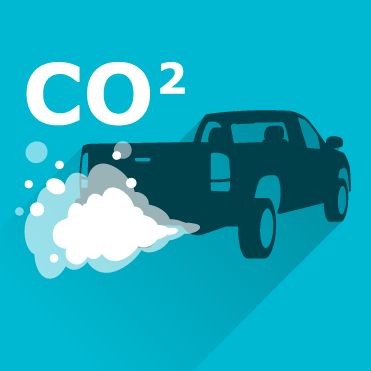

Se tiene el dataset  (<b>VehicleFuelConsumption.csv</b>)  que contiene informacion de diferentes tipos de vehiculos y algunos atributos:

    ENGINESIZE:  Tamaño del motor
    CYLINDERS:   Numero de cilindros
    FUELCONSUMPTION_CITY:   Consumo de combustible en ciudad (L/100 km)
    FUELCONSUMPTION_HWY	:   Consumo de combustible en carretera (L/100 km)
    FUELCONSUMPTION_COMB:   Consumo de combustible combinado  (L/100 km)
    CO2EMISSIONS:    Emisiones de CO2 (g/km)

Se quiere predecir `CO2EMISSIONS`  (Target)  con base a los otros atributos

In [ ]:
# carga el dataset
filename = "https://github.com/DanielSaromo/Courses_DataFiles/blob/main/P4DS_CETAM/VehicleFuelConsumption.csv?raw=true"
dataset = pd.read_csv(filename, delimiter=';')

In [ ]:
dataset.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


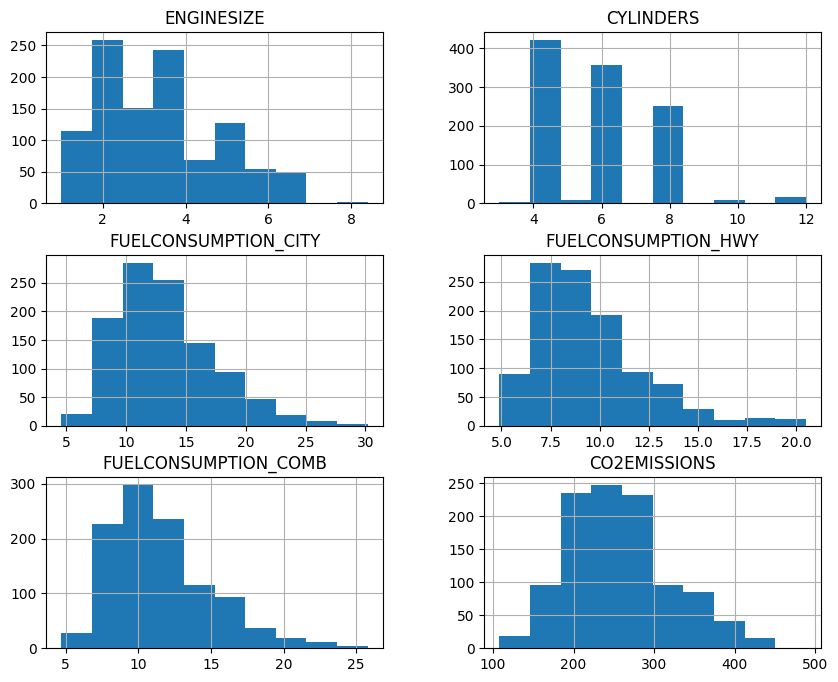

In [ ]:
# muestra la distribucion de las variables
dataset.hist(figsize=(10,8))
plt.show()

## Preguntas para desarrollar

### 1) Con los atributos `'ENGINESIZE'`, `'CYLINDERS'`, `'FUELCONSUMPTION_COMB'`, `'FUELCONSUMPTION_HWY'`; evalúe los siguientes algoritmos en su capacidad de generar predictores para `'CO2EMISSIONS'`: <font color='red'>5 puntos</font>

**<font color=red>Notar que hay una columna que no debe incluirse!</font>**


    - Linear Regression (LinearReg)
    - Ridge Regression (Ridge).
    - Lasso Regression (Lasso)
    - Elastic Net Regression (ElasticNet)
    - KNN regression (KNN)



Deberá realizar primero un split train-validacion, reservando el 20% de datos para validacion. La evaluacion de los algoritmos debera hacerlo sobre los datos de train en estrategia de 10-fold-CV usando la funcion de scoring=`'neg_mean_squared_error'`. Muestre boxplots con los resultados de crossvalidacion.

In [ ]:
X = dataset.values[:,0:4] # atributos
y = dataset.values[:,5]    # target

# realiza el train-test split
test_size = 0.20   # muestras para validacion
seed = 7   # NO CAMBIAR: semilla para el generador aleatorio (para reproductibilidad)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 853 ejemplos. Validation: 214 ejemplos


In [ ]:
X.shape

(1067, 4)

In [ ]:
# Otro método

X = dataset[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']] # atributos
y = dataset[['CO2EMISSIONS']]    # target

# realiza el train-test split
test_size = 0.20   # muestras para validacion
seed = 7   # semilla para el generador aleatorio (para reproductibilidad)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 853 ejemplos. Validation: 214 ejemplos


In [ ]:
X.shape

(1067, 4)

In [ ]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LinearReg', LinearRegression()))
algos.append(('Ridge', Ridge()))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN', KNeighborsRegressor()))

In [ ]:
# Evaluamos cada algoritmo de ML con la estrategia 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7 # NO CAMBIAR LA SEED
n_folds = 10
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -592.4081576371182 (101.77194544857132)
Ridge: -592.3597185193944 (101.86460374686862)
Lasso: -590.8020336450508 (104.47909926456626)
ElasticNet: -601.380688535836 (119.4899640615769)
KNN: -216.94482079343362 (106.46433250785843)


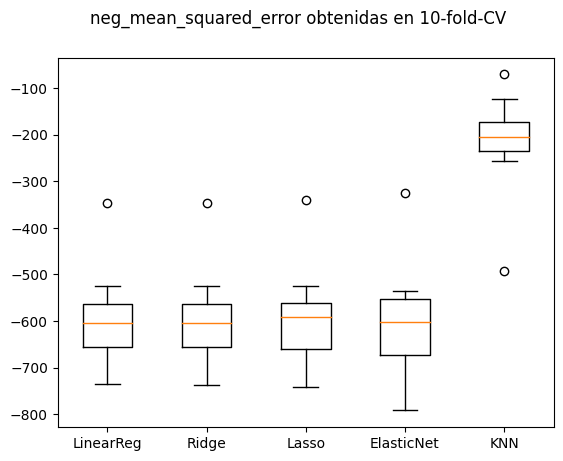

In [ ]:
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error obtenidas en %s-fold-CV' % str(n_folds))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 2) Elija el mejor algoritmo (justificando) y entrene con él un modelo con toda la data de train y prediga los datos de validación: <font color='red'>3 puntos</font>

Comentario: <font color=skyblue>En el boxplot, vemos que KNN tiene el mejor desempeño entre los algoritmos probados, y esto se debe a que posee el mayor valor de `neg_mean_squared_error`. Además, si consideramos su rango intercuartil, se observa que tiene valores más altos que los demás algoritmos. Por esta razón escogemos este algoritmo para entrenar los datos de entrenamiento y para su posterior uso en evaluación.</font>

De acuerdo a la métrica, ¿conviene tener un algoritmo con un mayor o menor valor posible de dicha métrica de error usada? Notar que hay una columna que no debe incluirse!

<font color=skyblue>Estamos analizando una métrica de scoring, que es el negativo del MSE. Conviene elegir un algoritmo con un mayor valor posible de dicha métrica. Por qué? Veamoslo de dos formas. 1) Si estamos cuantificando y comparando un _score_, es natural elegir el mayor valor, ya que el score es una métrica de puntaje (recompensa positiva). 2) Estamos midiendo el negativo del MSE. Entonces, si es que tenemos un valor alto de MSE, quiere decir que los valores predichos por la regresión difieren mucho de los esperados (recordar la definición matemática del MSE). Por lo tanto, buscamos elegir aquel algoritmo con el MENOR valor posible de MSE. Ahora, para la métrica estamos midiendo el **negativo** de dicho valor (neg_mean_squared_error). Por lo tanto, debemos elegir aquel algoritmo con el MAYOR valor encontrado de la métrica neg_mean_squared_error. Por otro lado, varios alumnos confundieron seleccionar el minimo valor ABSOLUTO, con el minimo valor del score.</font>

In [ ]:
# Reentrena con KNN sobre los datos de entrenamiento y lo prueba con el conjunto de validación
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

### 3) Reporte el Mean squared error, Mean absolute error, Explained variance score y R2 score: <font color='red'>2 puntos</font>

0.5 puntos por cada métrica.

In [ ]:
# predice el target en el conjunto de validacion
y_predicted = model.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

Mean squared error: 128.0134579439252
Mean absolute error: 5.130841121495325
Explained variance score: 0.9643246613563989
R2 score: 0.9641156229096027


### 4) Plotee, usando un scatter plot, los valores reales vs los predichos (en el conjunto de validación). Comente los resultados: <font color='red'>2 puntos</font>

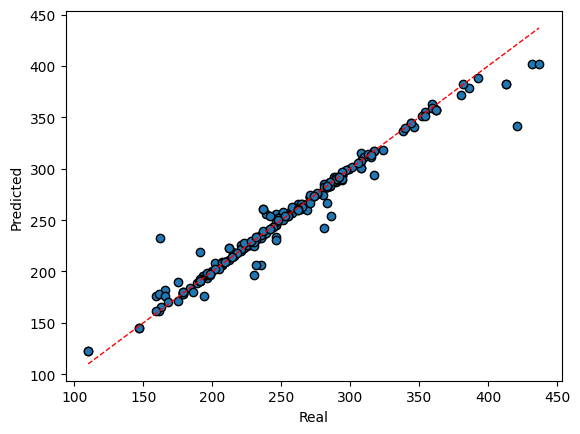

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=1)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Comentario: De los resultados vemos que el modelo entrenado con KNN, funciona bastante bien apesar de que se obervan algunos valores que escapan de su predicción.
También vemos que entre las medidas de evaluación para regresión, el R2 score obtiene un valor cercano a 1 (la mejor puntuación posible). Esto se comprueba en el scater plot donde la mayoria de puntos cae en la diagonal.
Y con respecto al Mean Absolute Error (MAE) nos indica que al ser la suma de las diferencias absolutas entre las predicciones y los valores reales. Nos da un valor pequeño pues nos indica que la magnitud del error en la predicción no es alta. Es decir, esta prediciendo bastante bien.


### 5) Repita los 4 pasos anteriores, pero esta vez realice su análisis evaluando pipelines (estandarizacion + algoritmo de Regresion). Compare los resultados con respecto a los resultados obtenidos previamente (en el análisis sin estandarización ni pipelines), y comente: <font color='red'>4 puntos</font>


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Definimos el pool de pipelines de ML (estandarizacion + algoritmo de ML) a evaluar
pipelines = []
pipelines.append(('LinearReg', make_pipeline(StandardScaler(), LinearRegression())))
pipelines.append(('Ridge', make_pipeline(StandardScaler(), Ridge())))
pipelines.append(('Lasso', make_pipeline(StandardScaler(), Lasso())))
pipelines.append(('ElasticNet', make_pipeline(StandardScaler(), ElasticNet())))
pipelines.append(('KNN', make_pipeline(StandardScaler(), KNeighborsRegressor())))

In [ ]:
# Evaluamos cada pipeline de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7   # NO CAMBIAR LA SEED
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada pipeline en crosvalidacion
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

LinearReg: -592.4081576371179 (101.7719454485712)
Ridge: -592.192951431761 (102.08059996803776)
Lasso: -591.0974574423938 (98.80786413673766)
ElasticNet: -651.946443185176 (93.31022446913227)
KNN: -229.59961367989058 (122.49262546580593)


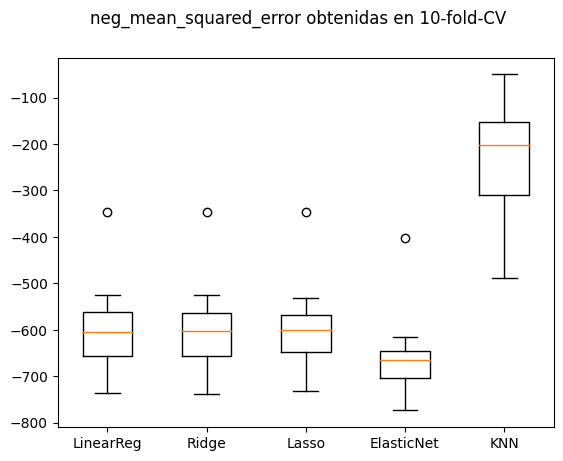

In [ ]:
# Muestra graficamente los resultados de neg_mean_squared_error en crossvalidacion de los pipelines evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error obtenidas en %s-fold-CV' % str(n_folds))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Comentario: Comparando los diferentes algoritmos, observamos que Linear regression, Ridge y Lasso Regression, se mantienen practicamente con valores constantes en el neg_mean_squared_error.
ElasticNet disminuye su valor con respecto a la anterior grafica. Lo cual indica que empeora su predicción. Y KNN se mantiene como el mejor algoritmo en predicción, aunque empeorando un poco su valor (bajó de -216 a -229).
Por esta razón nuevamente se elige KNN para realizar la predicción sobre el conjunto de validación.

In [ ]:
# PARA TENER CERCA LOS RESULTADOS, USAMOS NUEVAMENTE EL MODELO GENERADO EN LA PREGUNTA 2

# predice el target en el conjunto de validacion
y_predicted = model.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))


Mean squared error: 128.0134579439252
Mean absolute error: 5.130841121495325
Explained variance score: 0.9643246613563989
R2 score: 0.9641156229096027


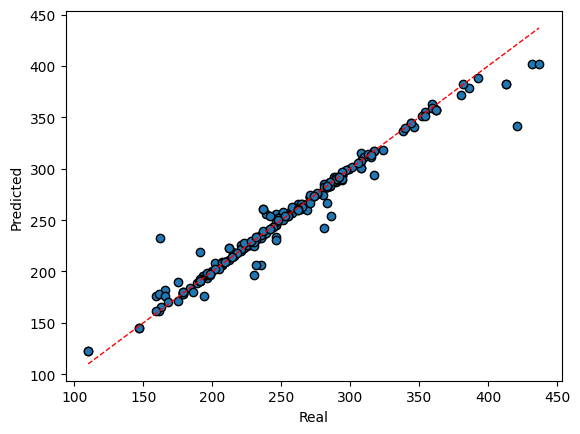

In [ ]:
# PARA TENER CERCA LOS RESULTADOS, USAMOS NUEVAMENTE EL MODELO GENERADO EN LA PREGUNTA 2

fig, ax = plt.subplots()
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=1)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Reentrenamos el mejor modelo en los datos de entrenamiento y probamos en el conjunto de validación:

Mean squared error: 146.6871028037383
Mean absolute error: 6.153271028037383
Explained variance score: 0.9589634427802866
R2 score: 0.9588810786314907


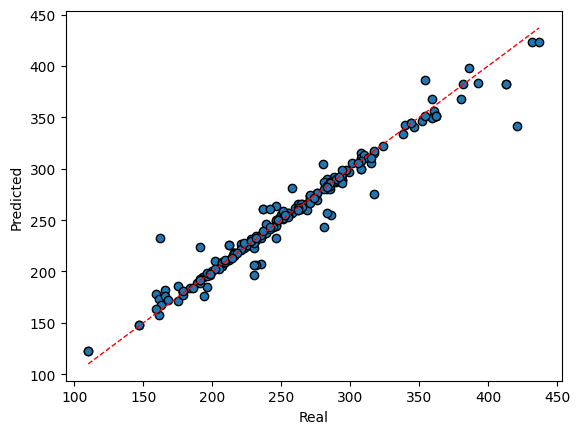

In [ ]:
# Reentrena el pipeline con KNN sobre los datos de entrenamiento y lo prueba en el conjunto de validación
modelpipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
modelpipeline.fit(X_train.values, y_train.values) # ponemos los .values para evitar que aparezca un warning

# predice el target en el conjunto de validacion
y_predicted = modelpipeline.predict(X_valid.values)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

# Plotea los valores reales vs los predichos en el conjunto de validacion
fig, ax = plt.subplots()
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=1)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Comentario: Vemos que los resultados han empeorado ligeramente. Por ejemplo el Mean squared error paso de 128 a 147, este incremento sugiere  que los valores outliers han aumentado. El Mean absolute error aumento de 5.12 a 6.15, lo cual podria sugerir que las diferencias absolutas entre las predicciones y los valores reales se han visto ligeramente alteradas, pero no mucho. El score de la varianza explicada y el score R2 presentan una variación desfavorable con respecto al último análisis. Podemos concluir que la decisión de estandarizar para KNN lleva a resultados similares, pero un poco desfavorables. El preprocesamiento de los datos, así como el ajuste de hiperparámetros, es dependiente de cada problema a abordar, y sus datos.

### 6) Análisis del caso práctico: <font color='red'>4 puntos</font>

Caso práctico (hipotético): Usted es el encargado de dar la buena pro para una licitación, en la cual se deben adquirir un grupo de 24 vehículos para ser usados como patrullas en una comisaría. Luego del proceso de selección, se tienen dos modelos finales que cumplen con los TDR.

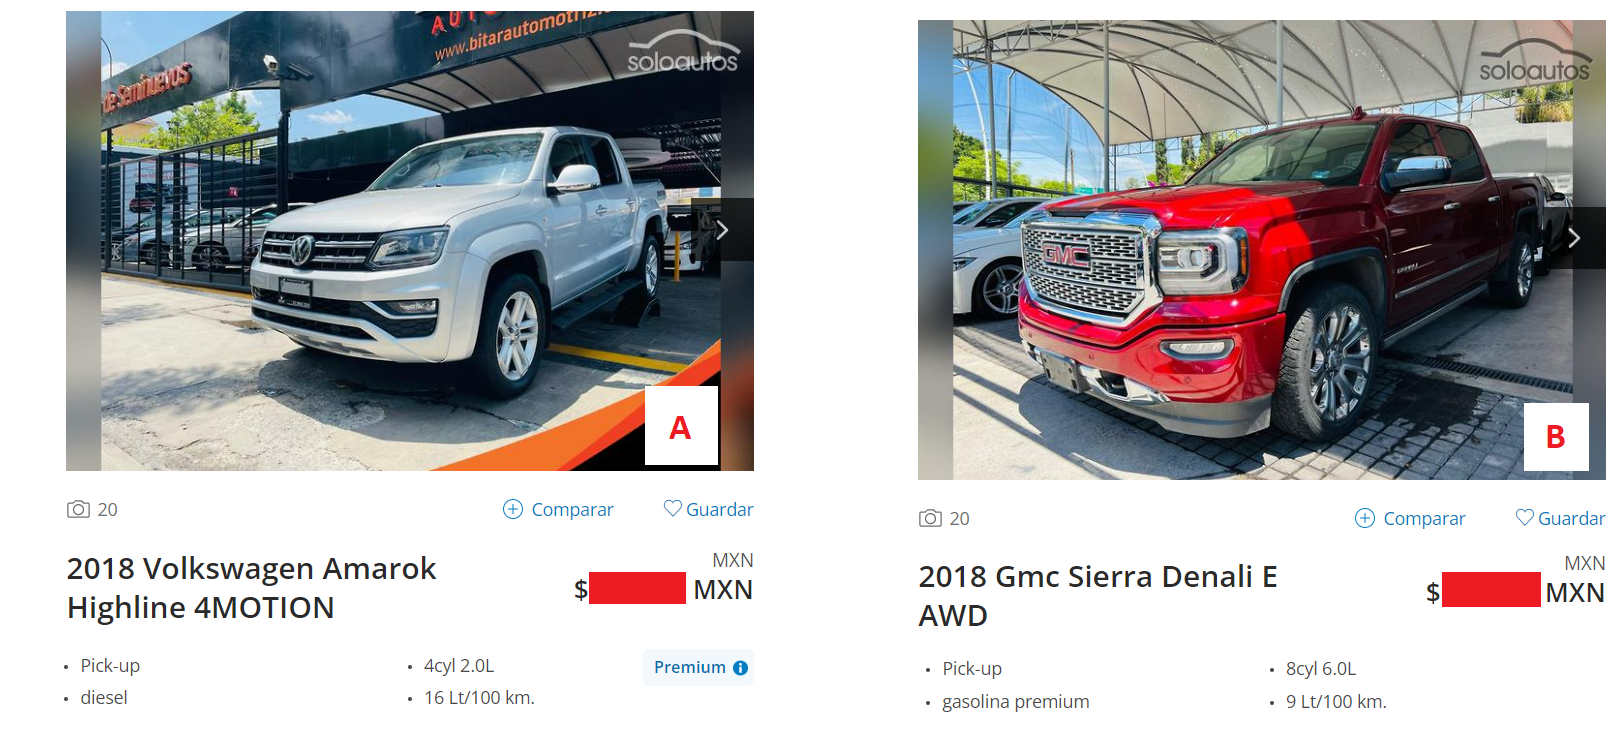

Además, de las fichas técnicas de dichos modelos, se obtuvo la siguiente información:

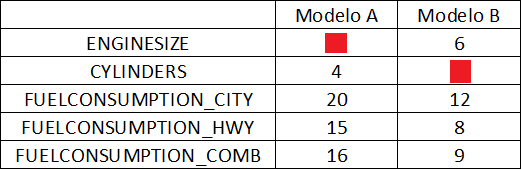

Tomando en cuenta únicamente factores ambientales (específicamente, emisión de CO2 de los vehículos), indicar cuál de los dos modelos de vehículos usted seleccionaría para que sean las patrullas de la comisaría a su cargo. Justificar su respuesta.

Asumir que el costo de los vehículos es similar, y que no influye en la decisión a ser tomada.

**<font color=red>Recordar que hay una columna que no debe incluirse! (ya que en el presente cuadernillo se solicitó trabajar con ciertas columnas específicas del dataset)</font>**

<font color=skyblue>De las imágenes con las fotos y datos técnicos de los vehículos, se puede completar la tabla:</font>

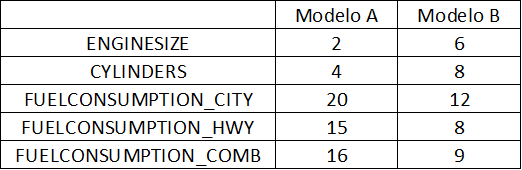

In [ ]:
dataset.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


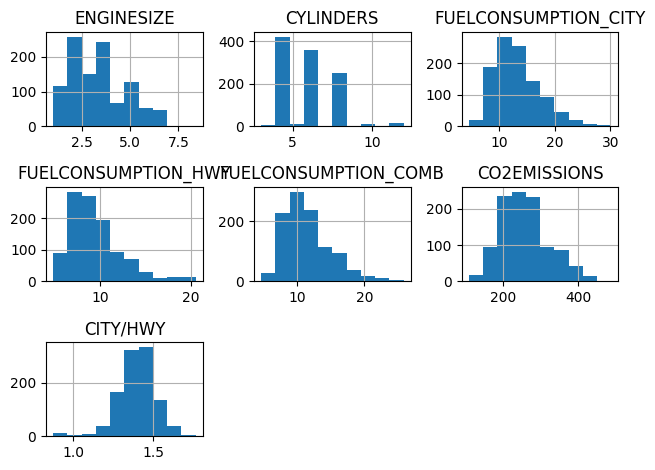

In [ ]:
dataset.hist()
plt.tight_layout()
plt.show()

In [ ]:
muestraDePrueba = np.array([[2, 4, 20, 15, 16],
                           [6, 8, 12, 8, 9]])

muestraDePrueba = muestraDePrueba[:, [0,1,3,4]] # hay una columna que no se considera

modelpipeline.predict(muestraDePrueba)

array([[272.6],
       [266.2]])

<font color=skyblue>De acuerdo al modelo de ML entrenado en el presente cuadernillo, el modelo A contaminaría más que el modelo B (`272.6 > 266.2`). Por lo tanto, se elegiría el modelo B.</font>